In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
healthy_filepath = 'data/healthy.csv'
healthy = np.genfromtxt(healthy_filepath, delimiter=',')[:, 0]

In [7]:
beams = ['a1', 'a6', 'a17', 'a18']
damages = [f'd{i}' for i in range(10, 91, 10)]

defectives = []
for beam in beams:
    data = np.array([])
    for damage in damages:
        defective_filepath = f'data/{beam}/{beam}_{damage}.csv'
        defective = np.genfromtxt(defective_filepath, delimiter=',')[:, 0]
        data = np.concatenate((data, defective))
    defectives.append(data)
defectives = np.array(defectives)

In [8]:
defectives.shape

(4, 900)

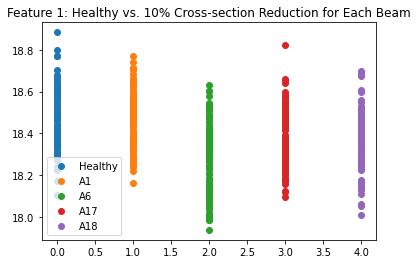

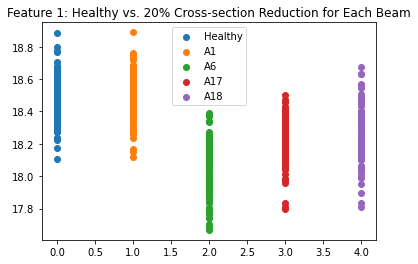

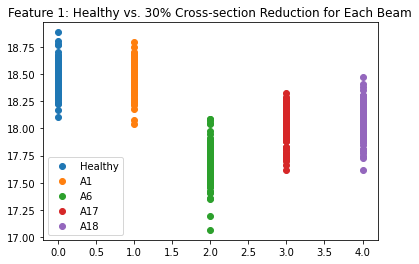

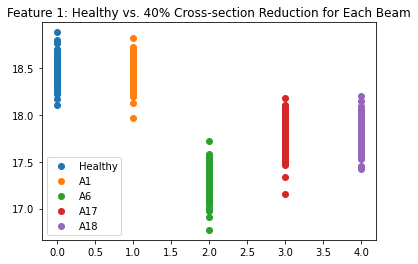

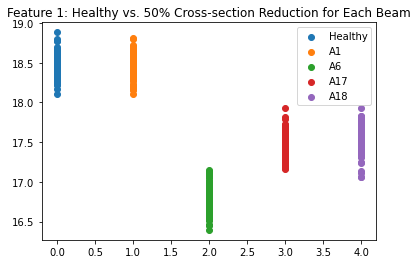

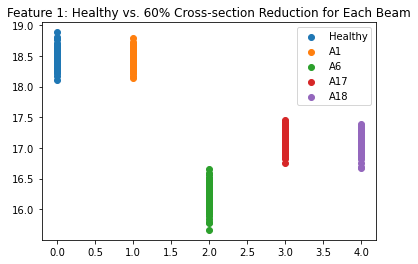

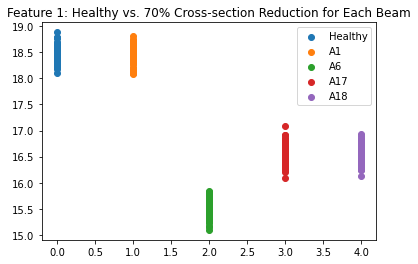

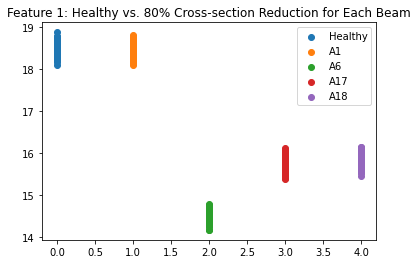

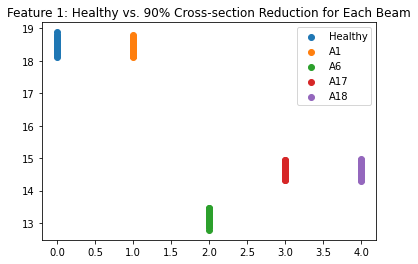

In [28]:
labels = beams.copy()
labels = [l.capitalize() for l in labels]
for d in range(9):
    plt.figure()
    plt.scatter([0] * healthy.shape[0], healthy, label='Healthy')
    for i, label in enumerate(labels):
        defective = defectives[i, d * 100: (d + 1) *100]
        plt.scatter([i + 1] * defective.shape[0], defective, label=label)
    plt.title(f'Feature 1: Healthy vs. {(d + 1) * 10}% Cross-section Reduction for Each Beam')
    plt.legend()
    plt.show()